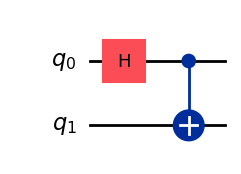

In [1]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output="mpl")

In [3]:
from qiskit.quantum_info import Pauli
ZZ=Pauli('ZZ')
ZI=Pauli('ZI')
IZ=Pauli('IZ')
XX=Pauli('XX')
XI=Pauli('XI')
IX=Pauli('IX')
observables = [ZZ, ZI, IZ, XX, XI, IX]

In [36]:
from qiskit_aer.primitives import Estimator
estimator=Estimator()
job = estimator.run([qc] * len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        ,  0.01171875,  0.01171875,  1.        , -0.01367188,
       -0.01367188]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000421959, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.002922334, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 8192, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9998626708984375, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000421959, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0

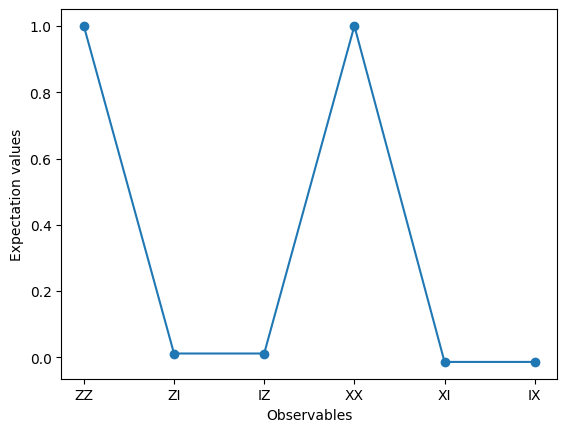

In [39]:
import matplotlib.pyplot as plt
data=["ZZ","ZI","IZ","XX","XI","IX"]
values=job.result().values
plt.plot(data,values,"-o")
plt.xlabel("Observables")
plt.ylabel("Expectation values")
plt.show()

Part 2: N qubit GHZ state hello world

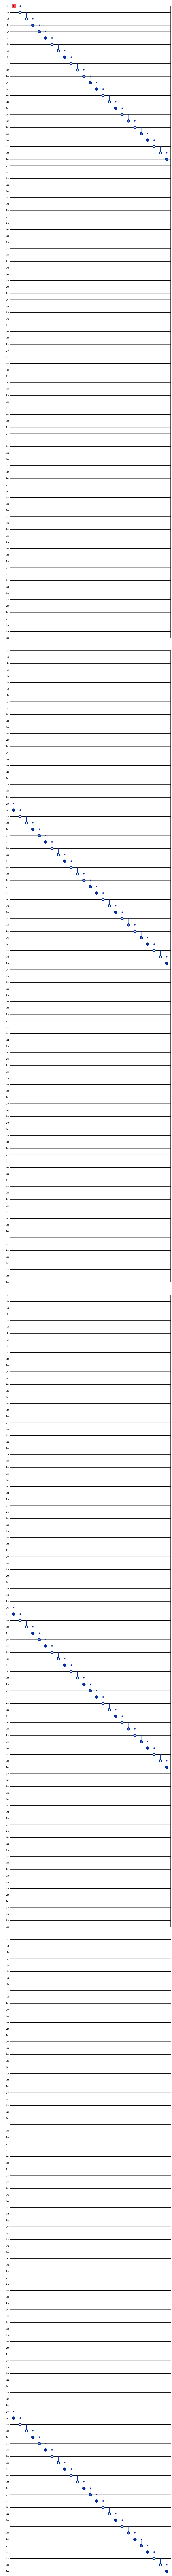

In [46]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc=QuantumCircuit(n)
    qc.h(0)
    for i in range (n-1):
        qc.cx(i,i+1)
    return qc
n=100
qc=get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output="mpl")

In [47]:
from qiskit.quantum_info import SparsePauliOp
operator_strings=["Z"+"I"*i+"Z"+"I"*(n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))
operators=[SparsePauliOp(operator_string) for operator_string in operator_strings]


['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [79]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
backend_name = "ibm_brisbane"
backend = QiskitRuntimeService().backend(backend_name)
pass_Manager = generate_preset_pass_manager(optimization_level=3, backend=backend)
qc_transpiled = pass_Manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

In [80]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions
options = EstimatorOptions()
options.resilience_level = 1
#options.optimization_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"
estimator = Estimator(backend, options=options)
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

czam54mb7tt0008g7gmg


In [81]:
job_id = "czam54mb7tt0008g7gmg"
service = QiskitRuntimeService()
job = service.job(job_id)

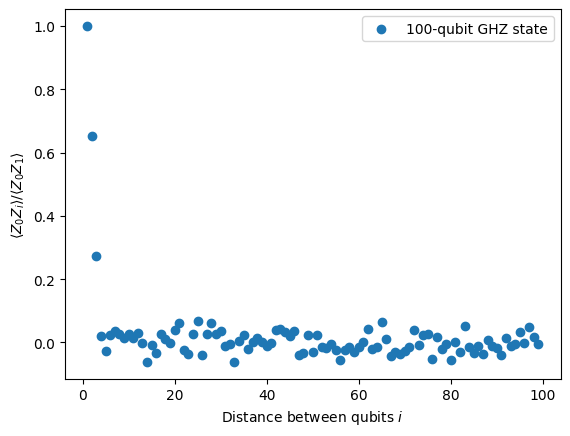

In [82]:
import matplotlib.pyplot as plt
data = list(range(1, len (operators)+1))
result = job.result() [0]
values = result.data.evs
values = [v / values [0] for v in values]
plt.scatter(data, values, marker='o', label='100-qubit GHZ state')
plt.xlabel( 'Distance between qubits $i$')
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$')
plt.legend ( ) 
plt.show()